In [ ]:
!git clone https://github.com/enriqueesanchz/workoutAI.git

Cloning into 'workoutAI'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 37 (delta 5), reused 35 (delta 3), pack-reused 0
Receiving objects: 100% (37/37), 4.44 MiB | 12.33 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [ ]:
#Leo los archivos.csv
import os

for archivo in os.listdir('workoutAI/data/csv'):
  print(archivo)

remo_bajo.csv
press_militar_2.csv
triceps_unilateral.csv
triceps_polea.csv
biceps_martillo.csv
press_militar.csv
press_sentado_2.csv
biceps_unilateral.csv
press_inclinado_2.csv
press_inclinado.csv
jalon_unilateral.csv
press_sentado.csv
jalon_al_pecho.csv


In [ ]:
import pandas as pd
df = pd.read_csv('workoutAI/data/csv/jalon_unilateral.csv')
print(df.shape)

(3500, 7)


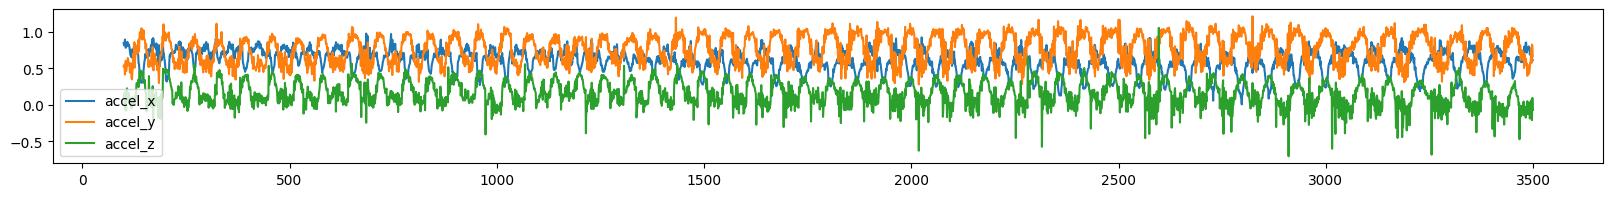

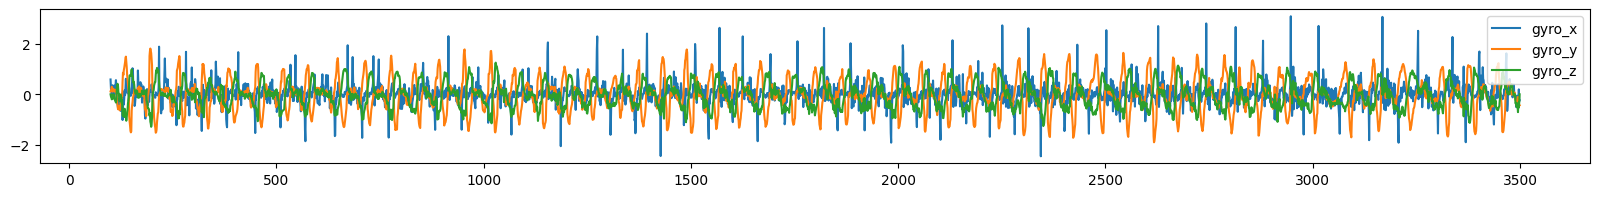

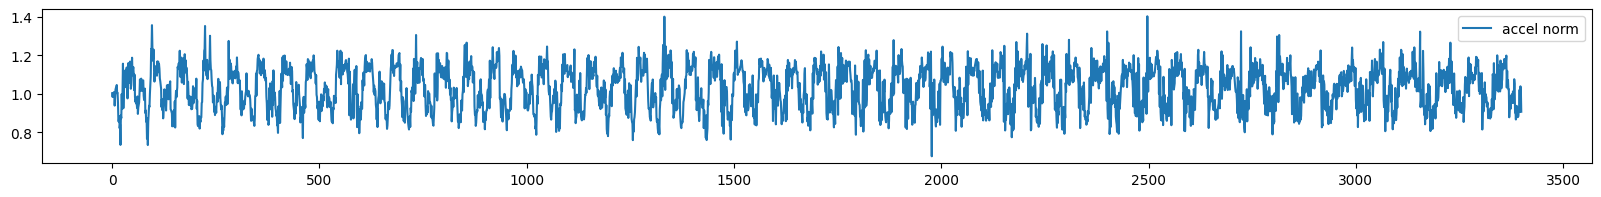

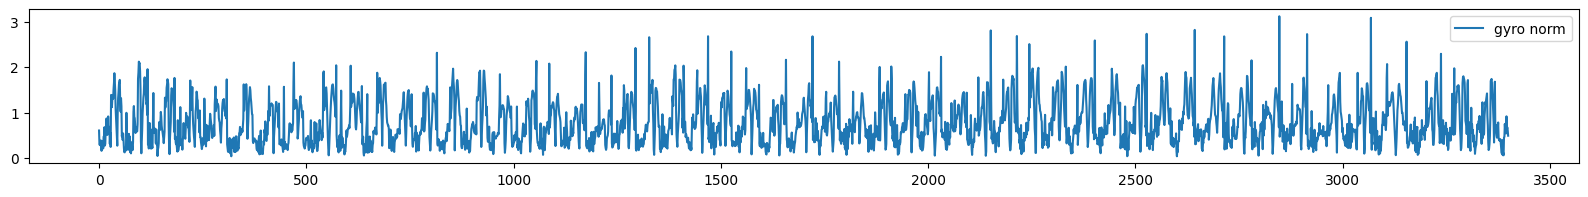

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

skip = 100
subset = df[skip:].drop('t', axis=1)

plt.figure(figsize=(20,2))
plt.plot(subset["accel_x"], label='accel_x')
plt.plot(subset["accel_y"], label='accel_y')
plt.plot(subset["accel_z"], label='accel_z')
plt.legend()

plt.figure(figsize=(20,2))
plt.plot(subset["gyro_x"], label='gyro_x')
plt.plot(subset["gyro_y"], label='gyro_y')
plt.plot(subset["gyro_z"], label='gyro_z')
plt.legend()

# TODO: Otra manera interesante es replicar el mismo código pero usando las normas
plt.figure(figsize=(20,2))
plt.plot(np.linalg.norm(subset[['accel_x','accel_y','accel_z']].values,axis=1), label='accel norm')
plt.legend()

plt.figure(figsize=(20,2))
plt.plot(np.linalg.norm(subset[['gyro_x','gyro_y','gyro_z']].values,axis=1), label='gyro norm')
plt.legend()

**Pasos a seguir:**
- Eliminamos el tiempo
- Eliminamos las primeras muestras
- Escogemos el eje con mayor std: el que más varía es donde mejor se ve la repetición
- Establecemos un umbral en ese eje
- Filtramos en un bucle para que no haya medidas repetidas

Tenemos la necesidad de establecer un criterio para el umbral:
Un porcentaje del máximo de un valor no puede serlo, puesto que si hay outliers no funciona bien.
- Método 1: Porcentaje del máximo: no funciona bien si hay outliers
- Método 2: Este umbral debe depender de la media/mediana y varianza
- Método 3: Percentil

# **Método 2: Mediana + varianza**

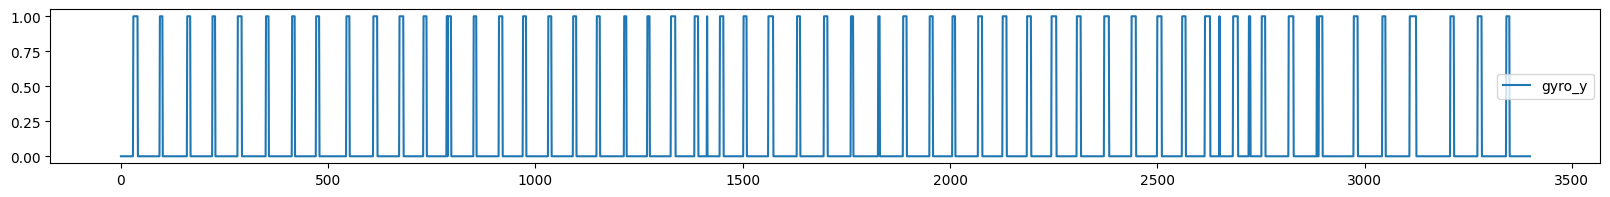

In [ ]:
max_std = subset.std(axis=0).idxmax(axis=0)
#umbral = subset[max_std].max(axis=0)*0.25 #Metodo 1
umbral = subset[max_std].median(axis=0)+subset[max_std].std(axis=0) #Metodo 2

repeticiones = [1 if x > umbral else 0 for x in subset[max_std]]
plt.figure(figsize=(20,2))
plt.plot(repeticiones, label=max_std)
plt.legend()

# Cuidado! Aquí no estamos teniendo en cuenta el número de muestras eliminadas
# (skip) en el eje x
# Esto solo lo necesitamos para que la representacion coincida

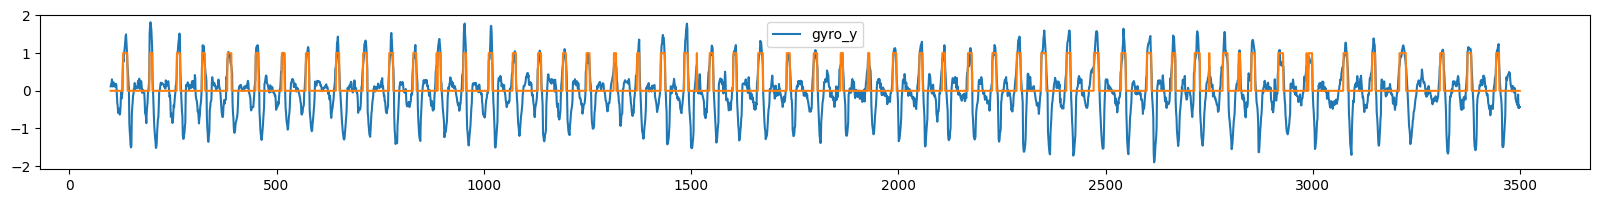

In [ ]:
# Realizamos la representacion encajando las repeticiones

plt.figure(figsize=(20, 2))
plt.plot(subset[max_std], label=max_std)
plt.plot(range(skip, len(repeticiones)+skip), repeticiones)
plt.legend()

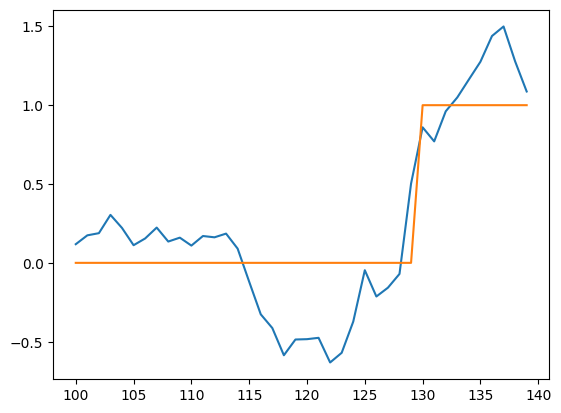

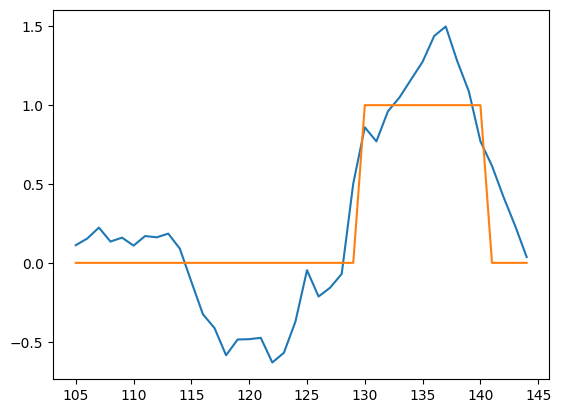

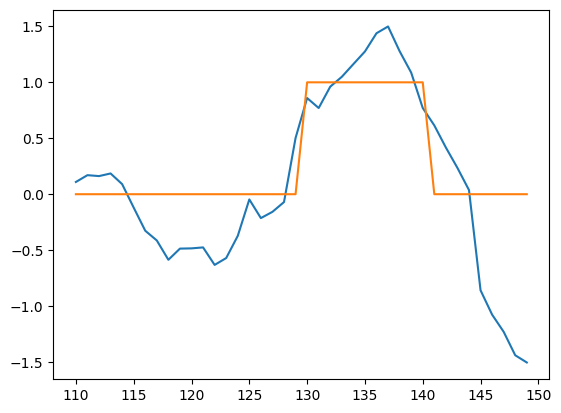

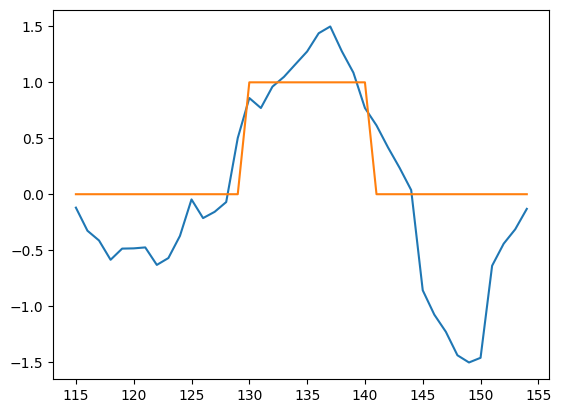

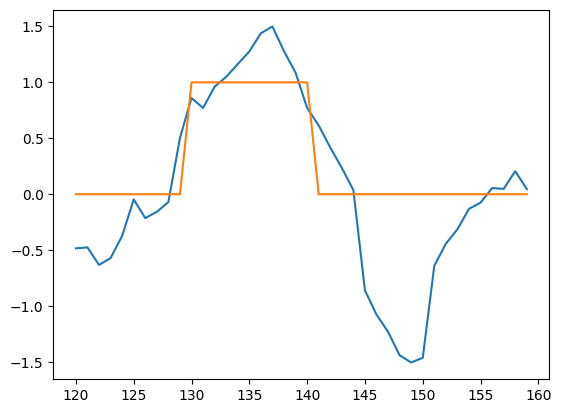

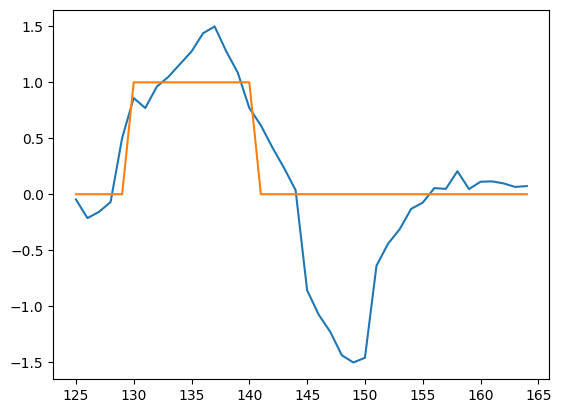

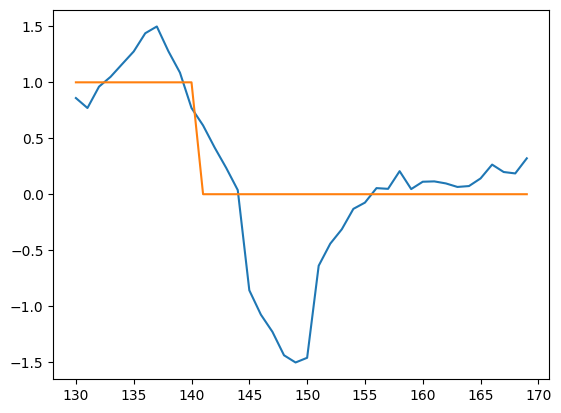

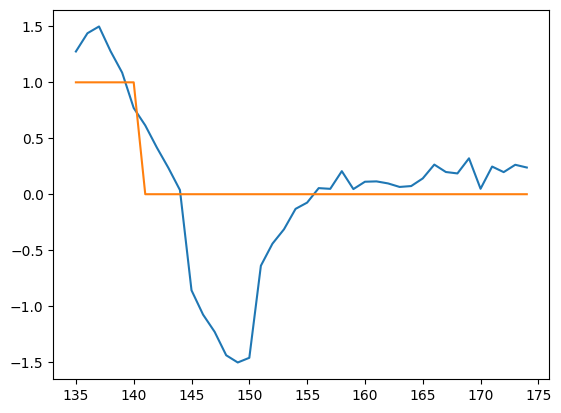

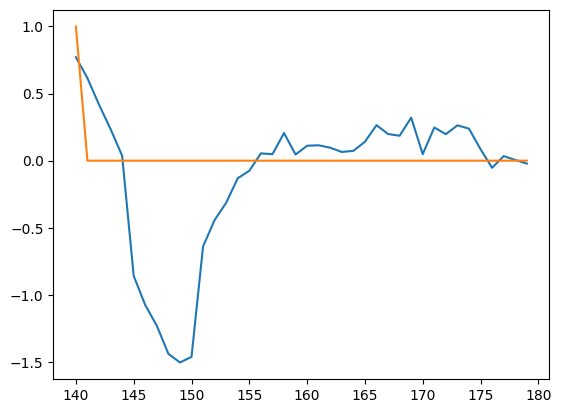

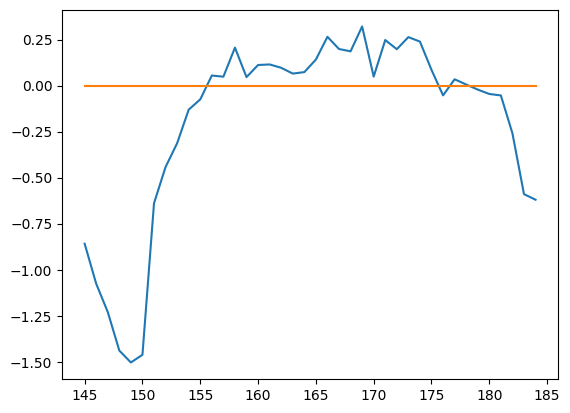

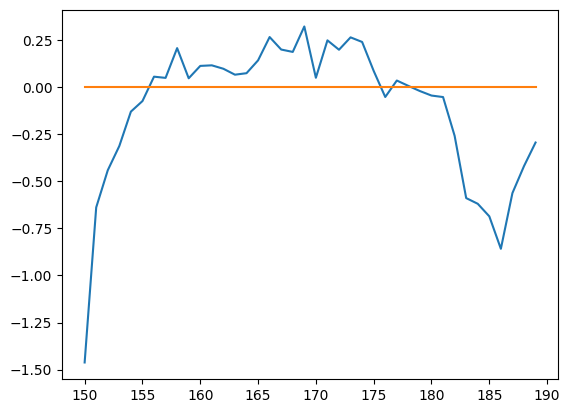

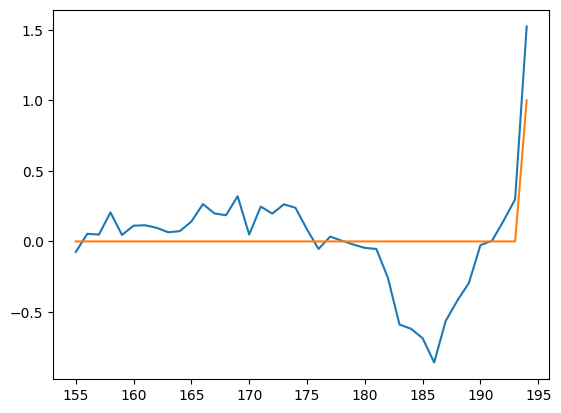

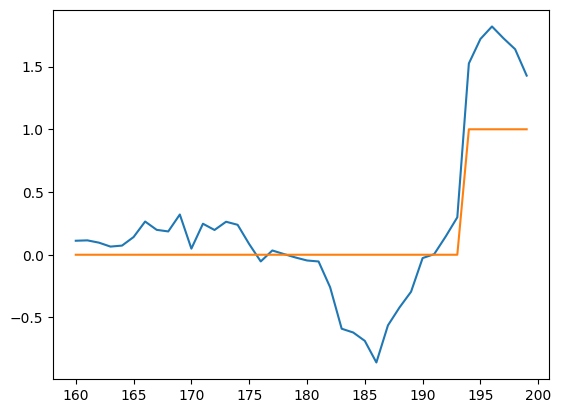

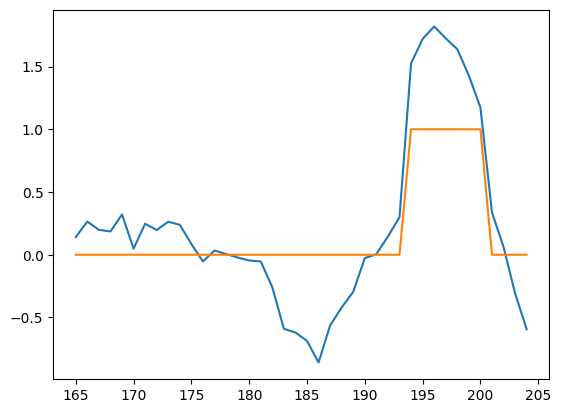

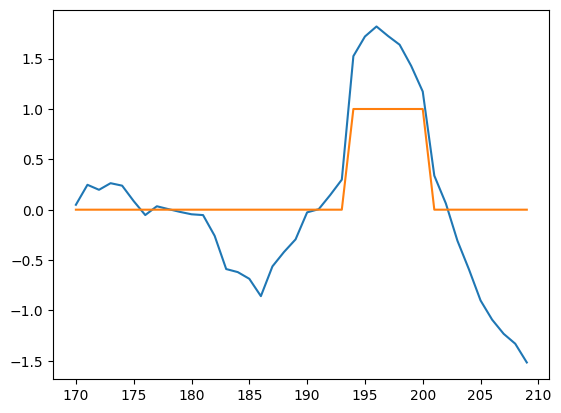

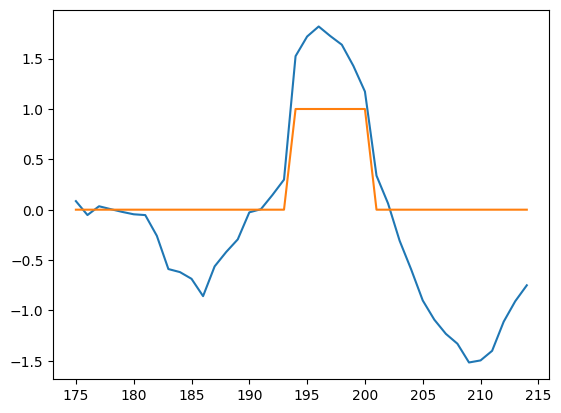

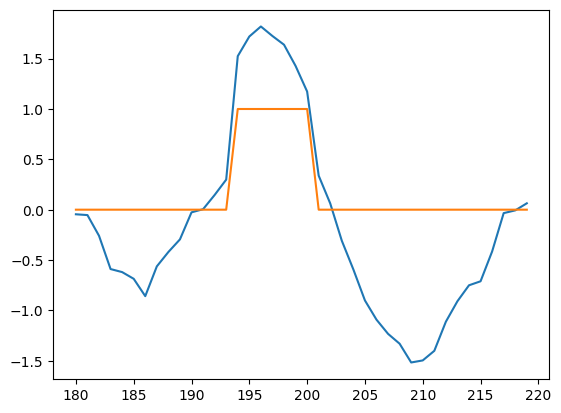

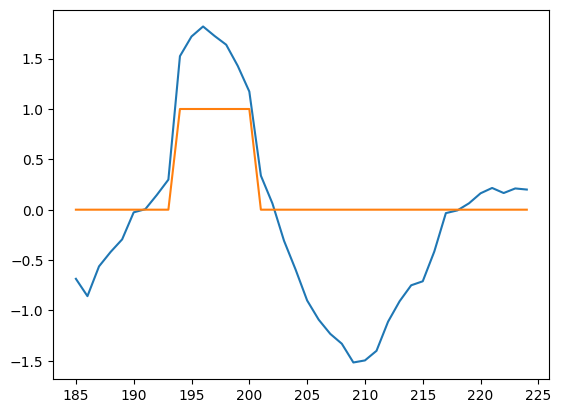

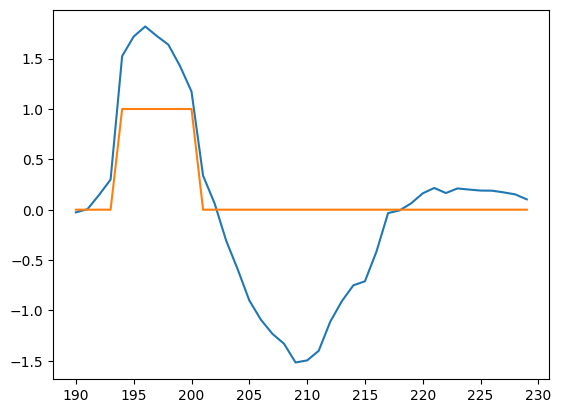

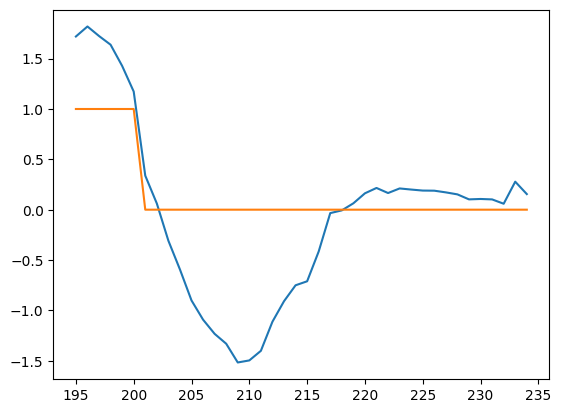

In [ ]:
# Representamos repeticion a repeticion, saltos de 5 muestras

ventana = 40

for i in range(0, 100, 5):
  plt.figure()
  plt.plot(subset[max_std][i:i+ventana])
  plt.plot(range(100+i, 100+i+ventana), repeticiones[i:i+ventana])
  plt.show()

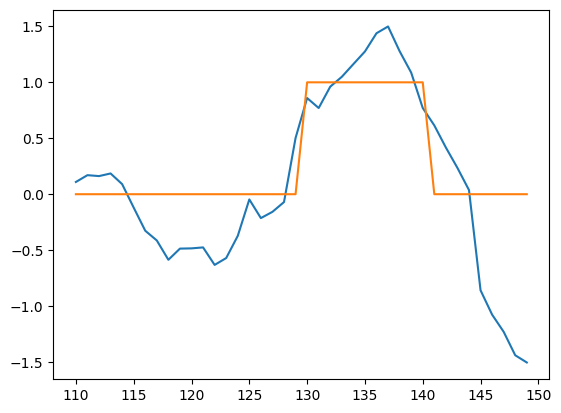

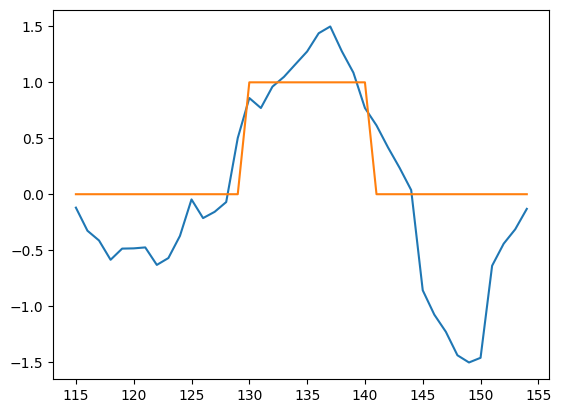

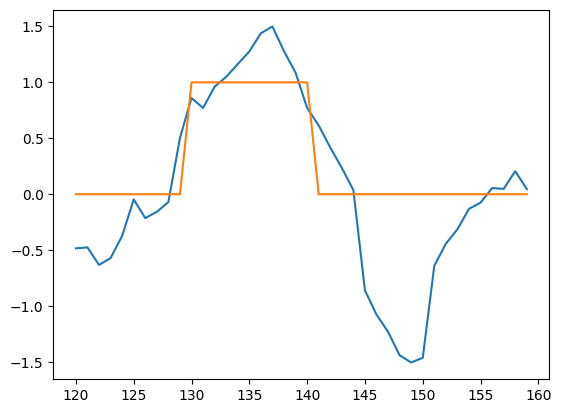

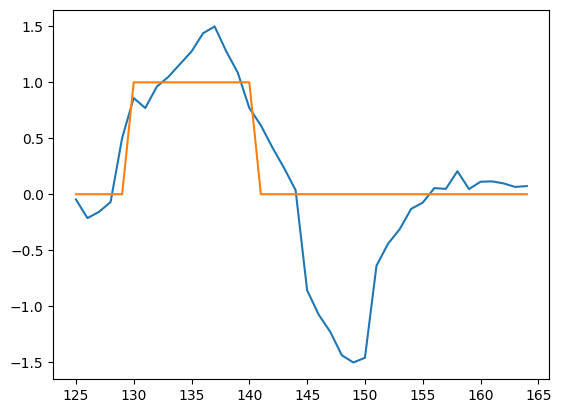

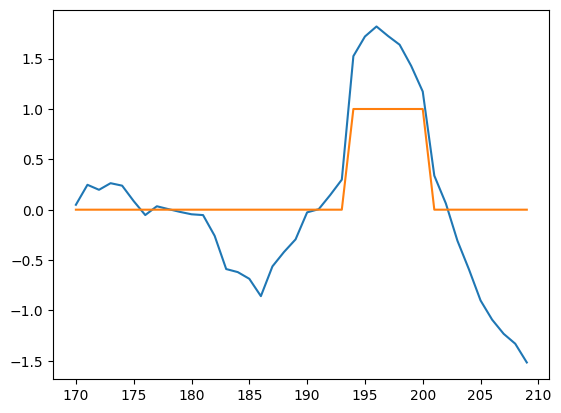

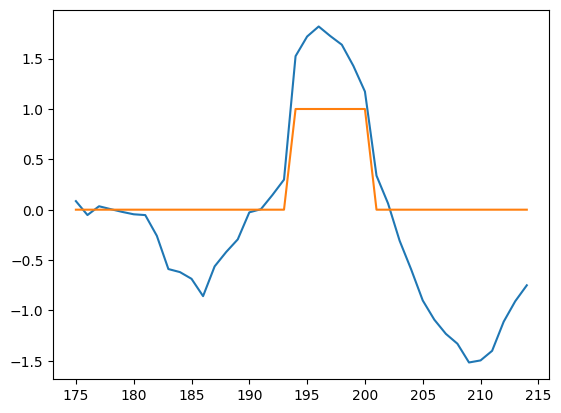

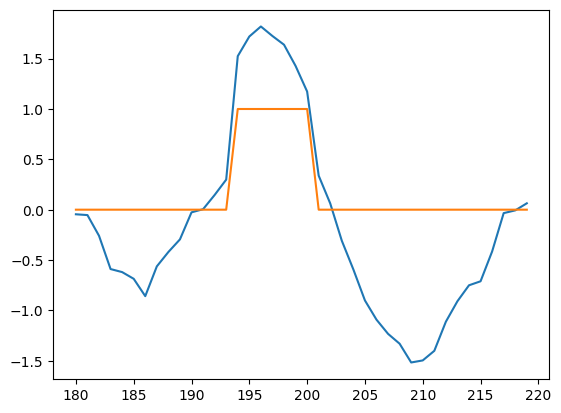

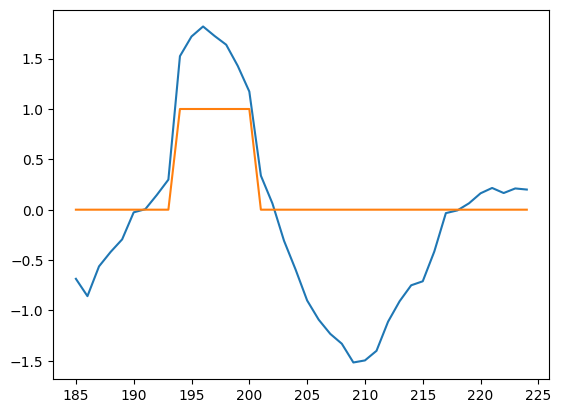

In [ ]:
# Nos quedamos solo las que contengan un 1 en sus muestras centrales

ventana = 40

for i in range(0, 100, 5):
  if(1 in repeticiones[i+15:i+25]):
    plt.figure()
    plt.plot(subset[max_std][i:i+ventana])
    plt.plot(range(100+i, 100+i+ventana), repeticiones[i:i+ventana])
    plt.show()


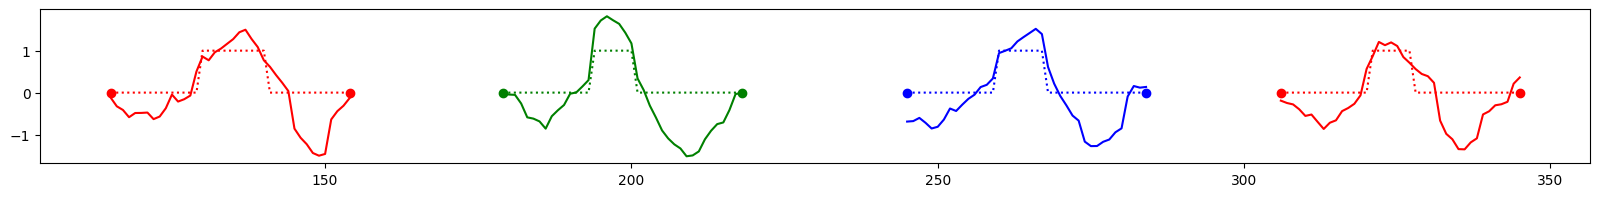

In [ ]:
# Podemos observar que hay repeticiones repetidas, por lo que las eliminamos

i = 0

plt.figure(figsize=(20,2))
pincel1 = ['r', 'g', 'b']
pincel2 = ['r:', 'g:', 'b:']
pincel3 = ['ro', 'go', 'bo']
contador = 0

ventana = 40
salto = 20

while i + ventana < 300:
  if(1 == repeticiones[i+15]):
    plt.plot(subset[max_std][i:i+ventana], pincel1[contador])
    plt.plot(range(100+i, 100+i+ventana), repeticiones[i:i+ventana], pincel2[contador])
    plt.plot(100+i, repeticiones[i], pincel3[contador])
    plt.plot(100+i+ventana-1, repeticiones[i+ventana], pincel3[contador])

    i = i + salto
    contador = (contador + 1) % 3

  else:
    i = i + 1

plt.show()

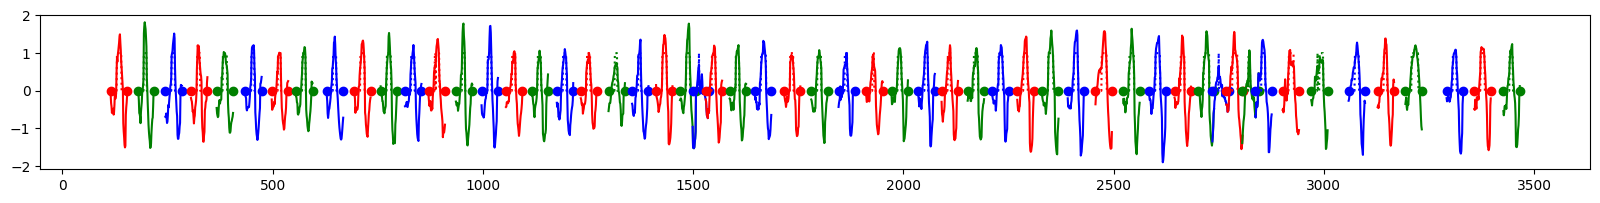

In [ ]:
# Ahora con todas las repeticiones

i = 0

plt.figure(figsize=(20,2))
pincel1 = ['r', 'g', 'b']
pincel2 = ['r:', 'g:', 'b:']
pincel3 = ['ro', 'go', 'bo']
contador = 0

ventana = 40
salto = 20

while i + ventana < len(repeticiones):
  if(1 == repeticiones[i+15]):
    plt.plot(subset[max_std][i:i+ventana], pincel1[contador])
    plt.plot(range(100+i, 100+i+ventana), repeticiones[i:i+ventana], pincel2[contador])
    plt.plot(100+i, repeticiones[i], pincel3[contador])
    plt.plot(100+i+ventana-1, repeticiones[i+ventana], pincel3[contador])

    i = i + salto
    contador = (contador + 1) % 3

  else:
    i = i + 1

plt.show()

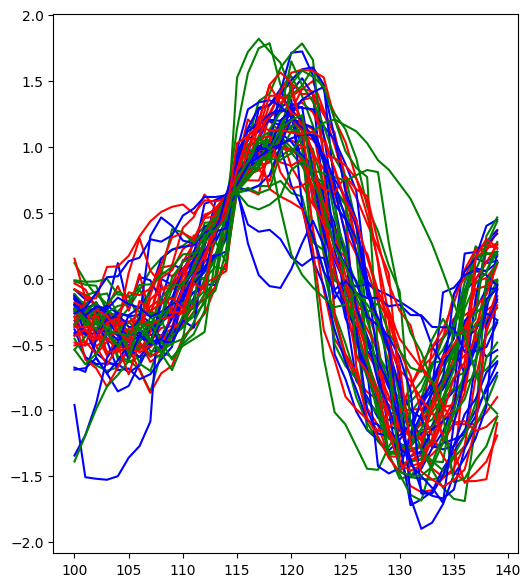

Eje: gyro_y
Número de repeticiones: 56


In [ ]:
# Ahora una encima de otra

i = 0

plt.figure(figsize=(6,7))
pincel1 = ['r', 'g', 'b']
pincel2 = ['r:', 'g:', 'b:']
pincel3 = ['ro', 'go', 'bo']
contador = 0

ventana = 40
salto = 20

while i + ventana < len(repeticiones):
  if(1 == repeticiones[i+15]):
    plt.plot(range(100, 100+ventana), subset[max_std][i:i+ventana], pincel1[contador % 3])

    i = i + salto
    contador = contador + 1

  else:
    i = i + 1

plt.show()
print("Eje:", max_std)
print("Número de repeticiones:", contador)

# Podemos observar el patrón existente entre las diferentes repeticiones

# **Método 3: Percentil**

In [1]:
serie_temporal = subset[max_std].values

# Ordena la serie temporal
sorted_data = np.sort(serie_temporal)

# Calcula la posición del percentil 90
position = 0.80 * (len(sorted_data) + 1)

# Si la posición es un número entero, el percentil 90 es el valor en esa posición.
# Si no es un número entero, interpola entre los valores adyacentes.
if position.is_integer():
    third_quartile = sorted_data[int(position) - 1]
else:
    lower_index = int(position)
    upper_index = lower_index + 1
    interpolation_factor = position - lower_index
    percentil_90 = (1 - interpolation_factor) * sorted_data[lower_index - 1] + interpolation_factor * sorted_data[upper_index - 1]

print(f"Percentil 90: {percentil_90}")

NameError: ignored

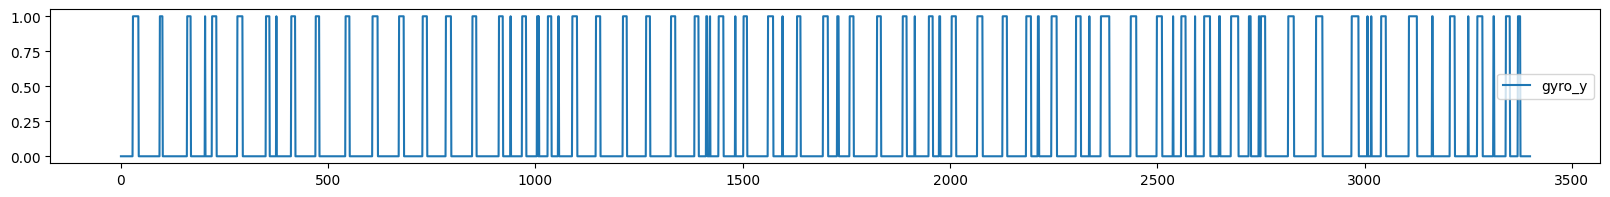

In [ ]:
max_std = subset.std(axis=0).idxmax(axis=0)
#umbral = subset[max_std].max(axis=0)*0.25 #Metodo 1
#umbral = subset[max_std].median(axis=0)+subset[max_std].std(axis=0) #Metodo 2
umbral = percentil_90 #Metodo 3


repeticiones = [1 if x > umbral else 0 for x in subset[max_std]]
plt.figure(figsize=(20,2))
plt.plot(repeticiones, label=max_std)
plt.legend()

# Cuidado! Aquí no estamos teniendo en cuenta el número de muestras eliminadas
# (skip) en el eje x
# Esto solo lo necesitamos para que la representacion coincida

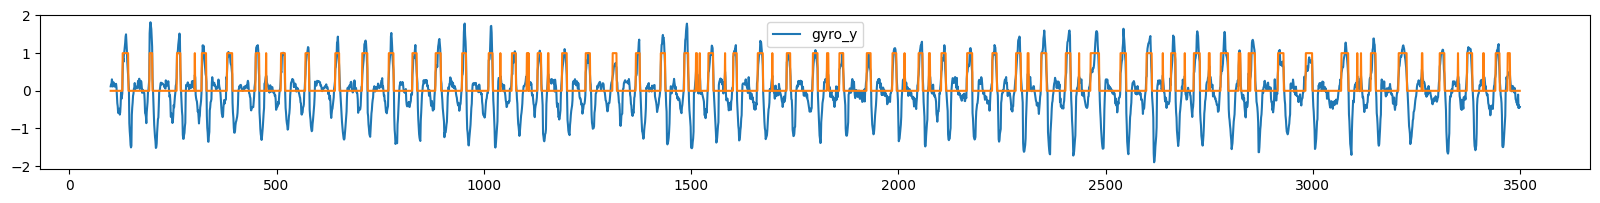

In [ ]:
# Realizamos la representacion encajando las repeticiones

plt.figure(figsize=(20, 2))
plt.plot(subset[max_std], label=max_std)
plt.plot(range(skip, len(repeticiones)+skip), repeticiones)
plt.legend()

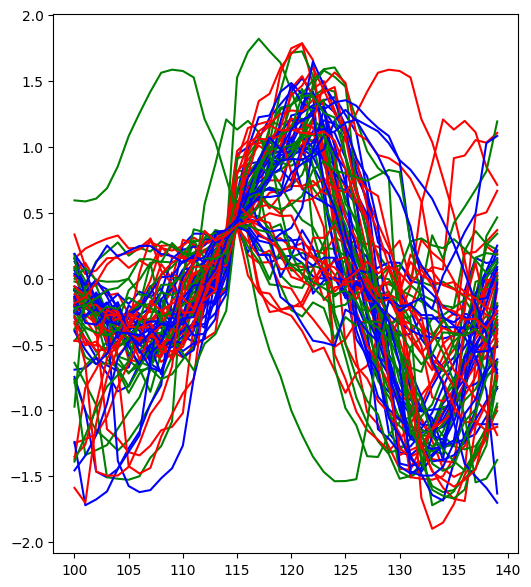

Eje: gyro_y
Número de repeticiones: 76


In [ ]:
# Ahora una encima de otra

i = 0

plt.figure(figsize=(6,7))
pincel1 = ['r', 'g', 'b']
pincel2 = ['r:', 'g:', 'b:']
pincel3 = ['ro', 'go', 'bo']
contador = 0

ventana = 40
salto = 20

while i + ventana < len(repeticiones):
  if(1 == repeticiones[i+15]):
    plt.plot(range(100, 100+ventana), subset[max_std][i:i+ventana], pincel1[contador % 3])

    i = i + salto
    contador = contador + 1

  else:
    i = i + 1

plt.show()
print("Eje:", max_std)
print("Número de repeticiones:", contador)

# Podemos observar el patrón existente entre las diferentes repeticiones